In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import signal
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
ROOT_PATH = "../"
song_df = pd.read_hdf(ROOT_PATH+'song_df.h5', 'song_df')
X = song_df.MFCC.values
y = song_df.Type.values

In [3]:
X_new = np.zeros((1440, 299*13))
for i,d in enumerate(X):
    X_new[i,:] = d[:, :].flatten()
print(X_new.shape)
X = X_new

(1440, 3887)


## PCA and t-SNE

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.06751662 0.05099659]
0.11851321499315493


#### First two components only explain 11% of the data which is not sufficient for clustering
#### Using T-SNE for further analysis. Reducing components for sufficient representation

In [58]:
# Reducing Dimensionality to a sufficient degree of explainability
pca = PCA(n_components=200)
pca_result = pca.fit_transform(X)

print(np.sum(pca.explained_variance_ratio_))

0.7712598011167089


In [69]:
n_sne = 1440

def get_tsne_results(pca_result, perp):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=5000)
    tsne_results = tsne.fit_transform(pca_result)
    return tsne_results

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1440 samples in 0.257s...
[t-SNE] Computed neighbors for 1440 samples in 21.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1440
[t-SNE] Computed conditional probabilities for sample 1440 / 1440
[t-SNE] Mean sigma: 251.888159
[t-SNE] KL divergence after 250 iterations with early exaggeration: 120.846352
[t-SNE] Error after 3250 iterations: 2.312798


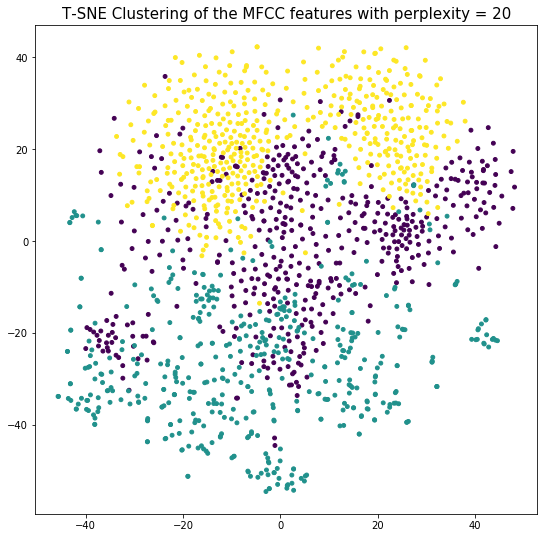

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1440 samples in 0.254s...
[t-SNE] Computed neighbors for 1440 samples in 21.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1440
[t-SNE] Computed conditional probabilities for sample 1440 / 1440
[t-SNE] Mean sigma: 280.929776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.545380
[t-SNE] Error after 1400 iterations: 1.898851


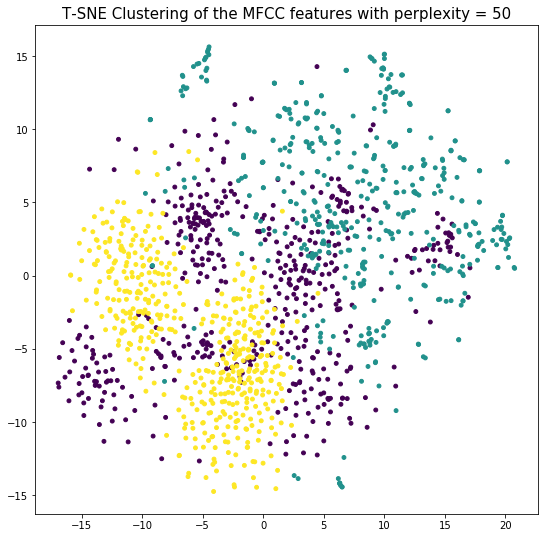

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1440 samples in 0.244s...
[t-SNE] Computed neighbors for 1440 samples in 20.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1440
[t-SNE] Computed conditional probabilities for sample 1440 / 1440
[t-SNE] Mean sigma: 301.550913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.071114
[t-SNE] Error after 2450 iterations: 1.482188


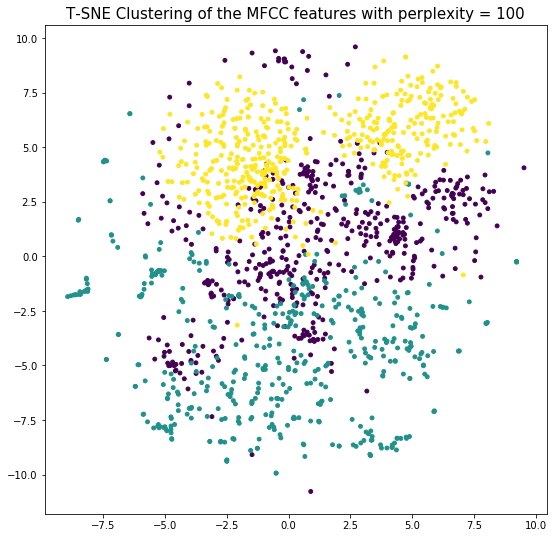

[t-SNE] Computing 1439 nearest neighbors...
[t-SNE] Indexed 1440 samples in 0.005s...
[t-SNE] Computed neighbors for 1440 samples in 0.344s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1440
[t-SNE] Computed conditional probabilities for sample 1440 / 1440
[t-SNE] Mean sigma: 386.027383
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.600388
[t-SNE] Error after 1200 iterations: 0.532452


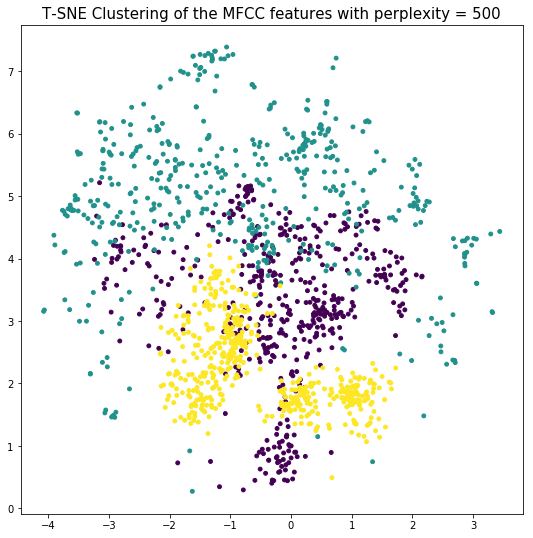

[t-SNE] Computing 1439 nearest neighbors...
[t-SNE] Indexed 1440 samples in 0.005s...
[t-SNE] Computed neighbors for 1440 samples in 0.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1440
[t-SNE] Computed conditional probabilities for sample 1440 / 1440
[t-SNE] Mean sigma: 456.173127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.264275
[t-SNE] Error after 1000 iterations: 0.288183


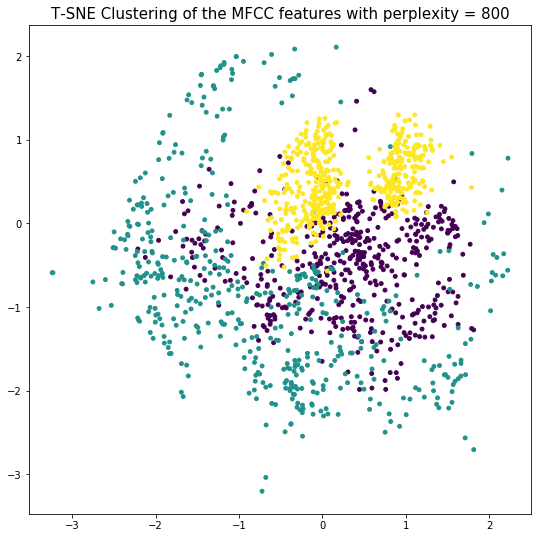

[t-SNE] Computing 1439 nearest neighbors...
[t-SNE] Indexed 1440 samples in 0.005s...
[t-SNE] Computed neighbors for 1440 samples in 0.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1440
[t-SNE] Computed conditional probabilities for sample 1440 / 1440
[t-SNE] Mean sigma: 517.884459
[t-SNE] KL divergence after 250 iterations with early exaggeration: 34.828102
[t-SNE] Error after 1200 iterations: 0.195281


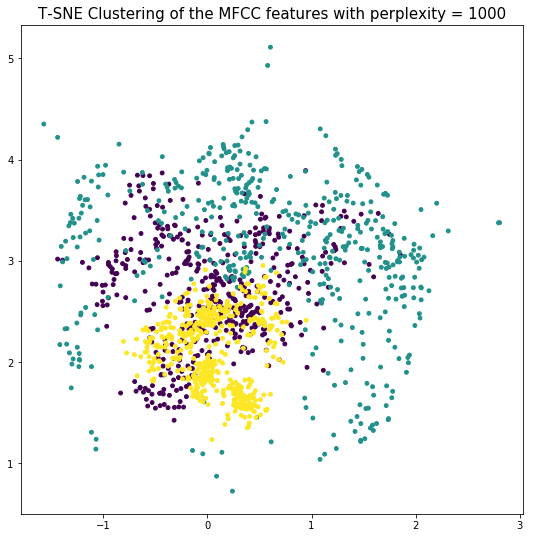

In [87]:
%matplotlib inline

perp_list = [20, 50, 100, 500, 800, 1000]
for i in perp_list:
    fig = plt.figure(figsize=(9, 9))
    tsne_results = get_tsne_results(X, i)
    plt.title("T-SNE Clustering of the MFCC features with perplexity = "+ str(i), fontsize=15)
    plt.scatter(tsne_results[:, 0], tsne_results[:,1], c=y, s=15)
    plt.show()
    #fig.savefig(ROOT_PATH+"images/tsne_cluster_"+str(i)+".pdf", bbox_inches='tight')

# Trying Simple KNN

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
from sklearn import metrics

y_pred = knn.predict(X_test)
print("Accuracy = ",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy =  63.19444444444444


# Trying SVM Classification

In [85]:
from sklearn import svm

# Creates a C-SVC
clf = svm.LinearSVC()

# Trains the model with training data
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [86]:
y_pred = clf.predict(X_test)
print("Accuracy = ",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy =  71.52777777777779
